### Student Information
Name:陳奕睿

Student ID: 110033624

GitHub ID: Eric870916

Kaggle name: eric870916

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2021-Lab2-master Repo](https://github.com/fhcalderon87/DM2021-Lab2-master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/c/dm2021-lab2-hw2/) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 24th 11:59 pm, Friday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 29th 11:59 pm, Wednesday)__. 

In [1]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])   

In [2]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [3]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [4]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)

In [5]:
# Answer here
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
train_counts = count_vect.fit_transform(train_df.text)
term_frequencies = np.asarray(train_counts.sum(axis=0))[0]
train_temp = [i for i in range(train_counts.shape[1])]
train_temp.sort(key = lambda s: term_frequencies[s],reverse=True)
train_top_30 = train_temp[:30]

In [6]:
import plotly.express as px
x_selected = [count_vect.get_feature_names_out()[i] for i in train_top_30]
y_selected = sorted(term_frequencies, reverse = True)[:30]

fig = px.bar(x=x_selected, y=y_selected)

fig.update_xaxes(tickangle=315)
fig.update_layout(xaxis_title="Token index", yaxis_title="Frequencies", title={
        'text': 'Word Frequencies of Train Data',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        })

fig.show()

In [7]:
count_vect = CountVectorizer()
test_counts = count_vect.fit_transform(test_df.text)
test_term_frequencies = np.asarray(test_counts.sum(axis=0))[0]
test_temp = [i for i in range(test_counts.shape[1])]
test_temp.sort(key = lambda s: test_term_frequencies[s],reverse=True)
test_top_30 = test_temp[:30]

In [8]:
import plotly.express as px
x_selected = [count_vect.get_feature_names_out()[i] for i in test_top_30]
y_selected = sorted(test_term_frequencies, reverse = True)[:30]

fig = px.bar(x=x_selected, y=y_selected)

fig.update_xaxes(tickangle=315)
fig.update_layout(xaxis_title="Token index", yaxis_title="Frequencies", title={
        'text': 'Word Frequencies of Test Data',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        })

fig.show()

---
## 2. Feature engineering
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [9]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
TFIDF_500 = TfidfVectorizer(max_features=500, tokenizer=nltk.word_tokenize)
TFIDF_500.fit(train_df['text'])

C:\Users\dt095\anaconda3\envs\datamining\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



TfidfVectorizer(max_features=500,
                tokenizer=<function word_tokenize at 0x0000021A07684EE0>)

In [10]:
TFIDF_feature_names_500 = TFIDF_500.get_feature_names_out()
TFIDF_feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheering', 'cheery', 'class',
       'come', 'comes', 'could', 'country'], dtype=object)

---
## 3. Model
### Decision Trees


In [11]:
from sklearn.tree import DecisionTreeClassifier

BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 
BOW_500.fit(train_df['text'])

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [12]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['anger', 'fear', 'fear', 'sadness', 'fear', 'joy', 'anger', 'fear',
       'joy', 'joy'], dtype=object)

---
## 4. Results Evaluation
Now we will check the results of our model's performance


In [13]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.99
testing accuracy: 0.66


In [14]:
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.64      0.69      0.67        84
        fear       0.65      0.67      0.66       110
         joy       0.68      0.66      0.67        79
     sadness       0.66      0.59      0.62        74

    accuracy                           0.66       347
   macro avg       0.66      0.65      0.66       347
weighted avg       0.66      0.66      0.66       347



In [15]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[58 16  6  4]
 [14 74 10 12]
 [ 9 11 52  7]
 [ 9 13  8 44]]


In [16]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

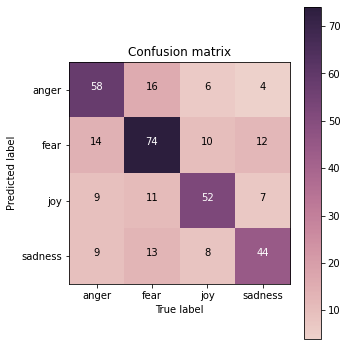

In [17]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?
### Answer:

As the results above shown, the f1-score of the class 'anger' is the highest, and the number of true positive of the class 'fear' is the highest.  
The confusion matrix above shows that the dicision tree model can classify the four classes correctly, which has 66% validation accuracy.  
However, the model has some difficulty on classifing the class 'anger' and class 'fear'.  
The reason why the model fail to classify those two classes is because the emotion of those class are similar, it also shown at the class 'fear' and the class 'sadness'.


---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

In [18]:
# Answer here
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()

clf.fit(X_train, y_train)

nb_y_train_pred = clf.predict(X_train)
nb_y_test_pred = clf.predict(X_test)

In [19]:
print(classification_report(y_true=y_test, y_pred=nb_y_test_pred))

              precision    recall  f1-score   support

       anger       0.64      0.67      0.65        84
        fear       0.73      0.77      0.75       110
         joy       0.77      0.70      0.73        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



In [20]:
from sklearn.metrics import confusion_matrix

nb_cm = confusion_matrix(y_true=y_test, y_pred=nb_y_test_pred) 

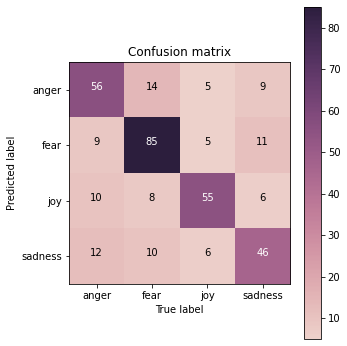

In [21]:
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(nb_cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

### Answer:

The f-1 score of each class on two different model

|   	            |   Anger	|   Fear	|    Joy	|   Sadness	|
|---	            |---	    |---	    |---	    |---	    |
|  Decision tree	|   0.67 	|   0.66	|   0.67	|   0.62	|
|  Naive Bayes	    |   0.65	|   0.75	|   0.73	|   0.63	|

Compare to the decision tree model, the Naive Bayes has the higher accuracy and f1-score.

Moreover, the Naive Bayes model solve the classification problem that mentioned above, which can classify the class 'fear' and the class 'anger' more precisely.

Based on the following reason, the Naive Bayse model might have the better performance when compare to the decision tree that did not be prunned.

* Simple decision trees tend to over fit the training data more so that other techniques which means you generally have to do tree pruning and tune the pruning procedures.

* Also simple decision trees divide the data into squares so building clusters around things means it has to split a lot to encompass clusters of data. Splitting a lot leads to complex trees and raises probability you are overfitting.

---
## 6. Deep Learning

In [22]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [23]:
## deal with label (string -> one-hot)

from keras import utils as np_utils
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.np_utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

# keras.utils.np_utils.to_categorical

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 532       anger
251       anger
112       anger
3469    sadness
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


### 6.3 Build model

In [24]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


In [25]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense (Dense)               (None, 64)                32064     
                                                                 
 re_lu (ReLU)                (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_1 (ReLU)              (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
 softmax (Softmax)           (None, 4)                 0     

### 6.4 Train

In [26]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25


C:\Users\dt095\anaconda3\envs\datamining\lib\site-packages\tensorflow\python\framework\indexed_slices.py:448: UserWarning:

Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 64), dtype=float32), dense_shape=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.



113/113 [==============================] - 1s 2ms/step - loss: 1.3213 - accuracy: 0.3761 - val_loss: 1.2630 - val_accuracy: 0.4438
Epoch 2/25
113/113 [==============================] - 0s 1ms/step - loss: 0.9961 - accuracy: 0.6263 - val_loss: 0.9719 - val_accuracy: 0.6340
Epoch 3/25
113/113 [==============================] - 0s 1ms/step - loss: 0.6043 - accuracy: 0.7888 - val_loss: 0.7960 - val_accuracy: 0.6772
Epoch 4/25
113/113 [==============================] - 0s 1ms/step - loss: 0.4249 - accuracy: 0.8453 - val_loss: 0.8143 - val_accuracy: 0.6801
Epoch 5/25
113/113 [==============================] - 0s 1ms/step - loss: 0.3345 - accuracy: 0.8790 - val_loss: 0.8616 - val_accuracy: 0.6628
Epoch 6/25
113/113 [==============================] - 0s 1ms/step - loss: 0.2705 - accuracy: 0.9078 - val_loss: 0.9156 - val_accuracy: 0.6628
Epoch 7/25
113/113 [==============================] - 0s 1ms/step - loss: 0.2280 - accuracy: 0.9214 - val_loss: 0.9765 - val_accuracy: 0.6657
Epoch 8/25
113/11

### 6.5 Predict on testing data

In [27]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

array([[9.9999344e-01, 4.3110703e-08, 3.2016972e-06, 3.2519674e-06],
       [1.4032122e-04, 1.6752452e-01, 8.2198465e-01, 1.0350487e-02],
       [4.5602733e-06, 9.9999440e-01, 3.7836921e-07, 6.7887669e-07],
       [2.7817270e-01, 1.1448432e-02, 1.2894880e-02, 6.9748396e-01],
       [1.7052262e-05, 9.9996018e-01, 2.2423583e-05, 3.7803596e-07]],
      dtype=float32)

In [28]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['anger', 'joy', 'fear', 'sadness', 'fear'], dtype=object)

In [29]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.67


### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots)  
How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

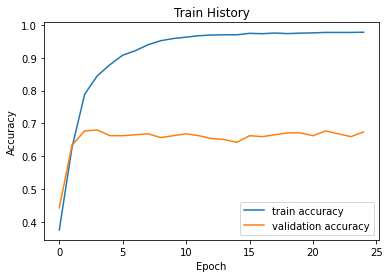

In [30]:
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('Train History')  
plt.ylabel('Accuracy')  
plt.xlabel('Epoch')  
plt.legend(['train accuracy', 'validation accuracy']) 
plt.show() 

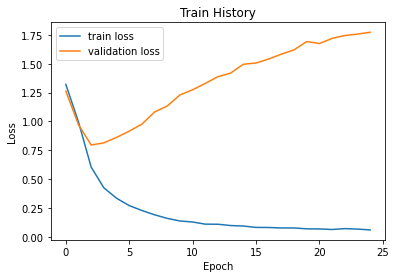

In [31]:
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('Train History')  
plt.ylabel('Loss')  
plt.xlabel('Epoch')  
plt.legend(['train loss', 'validation loss']) 
plt.show() 

---
## 7. Word2Vector

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

### 7.4 Using a pre-trained w2v model

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:

In [32]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

load ok


---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?
 
### Answer:
Yes, we can utilize these vectors as the training input.


However, we have to do some preproccesing as follow to make the length of each input sentence same.  


* average the vectors (component-wise), i.e., compute the word embedding vector for each word in the text, and average them. (as suggested by others).

* take the (component-wise) maximum of the vectors. (max, instead of average)

* take the (component-wise) minimum of the vectors. (min, instead of average)

Each of these yields a feature vector that is independent of the length of the text.

---
## 9. High-dimension Visualization: t-SNE

No matter if you use the Bag-of-words, tf-idf, or word2vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient...

Our aim will be to create a visualization similar to the one below:

In [33]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


### 9.1 Plot using t-SNE (2-dimension)

C:\Users\dt095\anaconda3\envs\datamining\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Users\dt095\anaconda3\envs\datamining\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



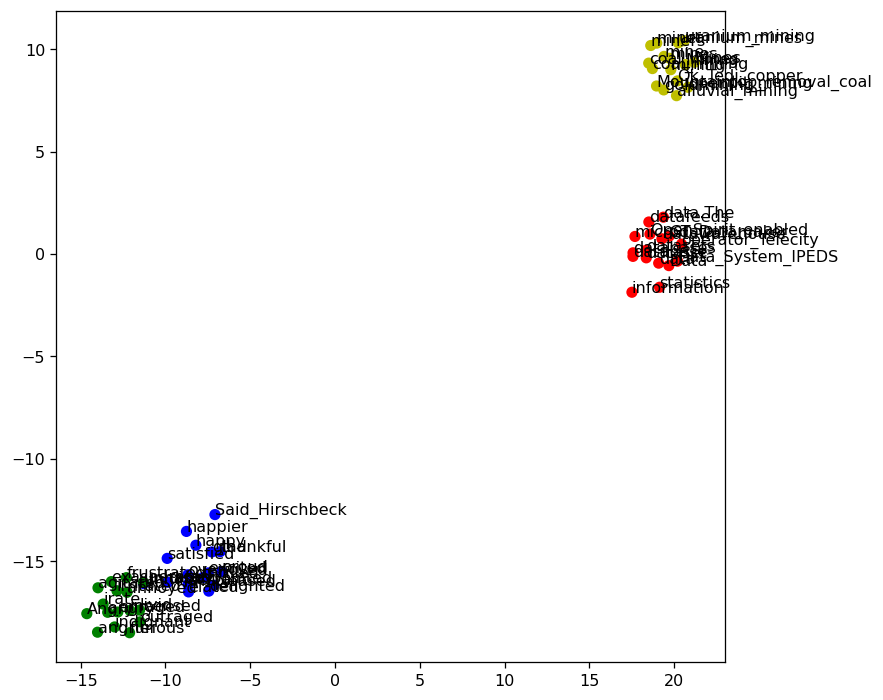

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28,square_distances = True)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [35]:
# Answer here
word_list = ['happy', 'angry', 'data', 'mining']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'information', 'database', 'Data_System_IPEDS', 'data.The', 'OpenSpirit_enabled', 'datafeeds', 'microdata', 'operator_Telecity', 'GT_Datamaker', 'datawarehouse']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner', 'uranium_mining', 'miners', 'Mountaintop_removal_coal', 'goldmining', 'alluvial_mining', 'Ok_Tedi_copper', 'uranium_mines', 'coal_mines', 'openpit_mining', 'Mines']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted

C:\Users\dt095\anaconda3\envs\datamining\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Users\dt095\anaconda3\envs\datamining\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



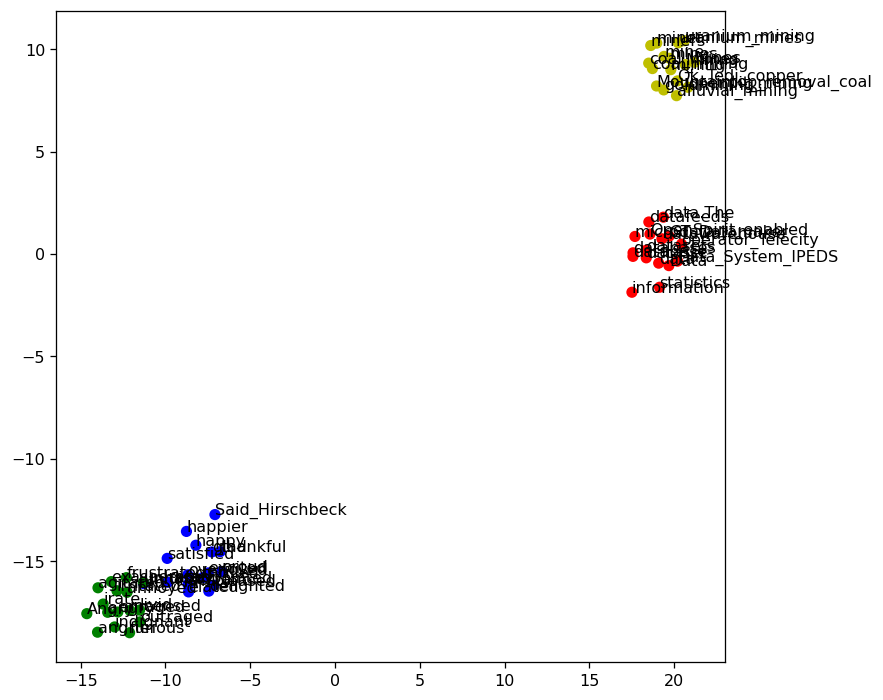

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28,square_distances = True)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---
## Kaggle competition

There are five parts in my report of the kaggle competition as follow:

    1. Data preprocessing
    2. Feature engineering
    3. MLP classifier
    4. Output prediction
    5. Discussion


---
## 1. Data preprocessing

In this part, I firstly seperate the **data_identification.csv** into two dataset **train_id** and **test_id**, which contain the tweet id of train data and test data, respectively.

Next, applying the same process on **emotion.csv** to get two dataset **train_emotion** and **test_emotion**.

In order to get the text information, I have to extract the text data from the **tweets_DM.json** dataset into two dataset **train_text** and **test_text**.

After doing above processes, the six datatsets are merged into two new datasets, **train_data** and **test_data** based on the tweet id.


In [1]:
import pandas as pd
import numpy as np

In [2]:
data_identification = pd.read_csv("data_identification.csv", skiprows=1, header=None,names=["tweet_id", "identification"])
train_label = pd.read_csv("emotion.csv", skiprows=1, header=None,names=["tweet_id", "emotion"])
data_identification

,tweet_id,identification
0,0x28cc61,test
1,0x29e452,train
2,0x2b3819,train
3,0x2db41f,test
4,0x2a2acc,train
...,...,...
1048570,0x2ca9b5,test
1048571,0x36a70d,train
1048572,0x239fc4,train
1048573,0x1f49be,train


In [3]:
train_id_df = data_identification.loc[data_identification["identification"] == 'train']
train_id = list(train_id_df['tweet_id'])
test_id_df = data_identification.loc[data_identification["identification"] == 'test']
test_id = list(test_id_df['tweet_id'])
train_id_df

,tweet_id,identification
1,0x29e452,train
2,0x2b3819,train
4,0x2a2acc,train
5,0x2a8830,train
6,0x20b21d,train
...,...,...
1048569,0x29f2c6,train
1048571,0x36a70d,train
1048572,0x239fc4,train
1048573,0x1f49be,train


In [4]:
raw_data = pd.read_json('tweets_DM.json', lines=True)
source = raw_data['_source']
raw_data['tweet_id'] = source.apply(lambda x: x['tweet']['tweet_id'])
raw_data['text'] = source.apply(lambda x: x['tweet']['text'])
id_text = raw_data[['tweet_id', 'text']]
# id_text

In [5]:
train = pd.merge(id_text, train_label, on='tweet_id')
train

,tweet_id,text,emotion
0,0x376b20,"People who post ""add me on #Snapchat"" must be ...",anticipation
1,0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",sadness
2,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,fear
3,0x1d755c,@RISKshow @TheKevinAllison Thx for the BEST TI...,joy
4,0x2c91a8,Still waiting on those supplies Liscus. <LH>,anticipation
...,...,...,...
1455558,0x321566,I'm SO HAPPY!!! #NoWonder the name of this sho...,joy
1455559,0x38959e,In every circumtance I'd like to be thankful t...,joy
1455560,0x2cbca6,there's currently two girls walking around the...,joy
1455561,0x24faed,"Ah, corporate life, where you can date <LH> us...",joy


In [6]:
test = pd.merge(test_id_df, id_text, on='tweet_id')
test = test.drop(['identification'], axis=1)
test

,tweet_id,text
0,0x28cc61,@Habbo I've seen two separate colours of the e...
1,0x2db41f,@FoxNews @KellyannePolls No serious self respe...
2,0x2466f6,"Looking for a new car, and it says 1 lady owne..."
3,0x23f9e9,@cineworld “only the brave” just out and fount...
4,0x1fb4e1,Felt like total dog 💩 going into open gym and ...
...,...,...
231254,0x1df27b,I am now the PROUD owner of a 2009 Subaru Fore...
231255,0x2bcafb,"So Stephen Paddock is considered a terrorist, ..."
231256,0x32a09d,"Just to think, how on earth did the @USNavy wi..."
231257,0x36de29,"Anyone any idea why, England, playing at home,..."


---
## 2. Feature engineering

In this part, I will introduce the feature engineering that I use in the competition.
In the competiton, **the-bag-of-words** model is applied to represent words in the text in both training data and testing data.

The bag-of-words model is a simplifying representation used in natural language processing. In this model, a text is represented as the multiset of its words, disregarding grammar and even word order but keeping multiplicity.

The total number of the words in the training data is large, which may slower the classification training process.

As the result, I choose the top 500 words as the input of my classifier model.

Also, the training data is splited into training data and validation data in 8:2. 

In [7]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize)
BOW_500.fit(train['text'])

C:\Users\dt095\anaconda3\envs\datamining\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


CountVectorizer(max_features=500,
                tokenizer=<function word_tokenize at 0x0000018183AB5670>)

In [8]:
train_dataset = train[:1164450]
vaild_dataset = train[1164450:]

In [9]:
X_train = BOW_500.transform(train_dataset['text'])
X_valid = BOW_500.transform(vaild_dataset['text'])

In [10]:
test_emb = BOW_500.transform(test['text'])

In [11]:
y_train = train_dataset['emotion']
y_valid = vaild_dataset['emotion']

In [12]:
from tensorflow import keras
from tensorflow.keras import utils
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
def label_encode(le, labels):
    enc = le.transform(labels)
    return utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_valid = label_encode(label_encoder, y_valid)

---
## 3. MLP clasifier

In order to classify the texts among eight emotions, the MLP classifer is applied.

A multilayer perceptron (MLP) is a class of feedforward artificial neural network.

An MLP consists of at least three layers of nodes: an input layer, a hidden layer and an output layer.

Except for the input nodes, each node is a neuron that uses a nonlinear activation function. MLP utilizes a supervised learning technique called backpropagation for training.

Its multiple layers and non-linear activation distinguish MLP from a linear perceptron. It can distinguish data that is not linearly separable.

The parameter setting is shown below.
| Parameters  |  Detail |
|---|---|
|  Structure |  500-100-200-200-8 |
|  Activation function |  ReLu |
|  Loss function |  Crossentropy |
|  Optimizer |  Adam |
|  Epoch |  50 |
|  Batch Size  |  100 |

The training and validation accuracy of this structure are around 50% which means that the model is probably underfitting.

In [13]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  8


In [14]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))
X = model_input

# 1st hidden layer
X_W1 = Dense(units=100)(X)
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=200)(H1)
H2 = ReLU()(H1_W2)

# 2nd hidden layer
H2_W3 = Dense(units=200)(H2)
H3 = ReLU()(H2_W3)

# output layer
H3_W4 = Dense(units=output_shape)(H3)
H4 = Softmax()(H3_W4)

model_output = H4

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense (Dense)               (None, 100)               50100     
                                                                 
 re_lu (ReLU)                (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 re_lu_1 (ReLU)              (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 200)               40200     
                                                                 
 re_lu_2 (ReLU)              (None, 200)               0     

In [15]:
# training setting
epochs = 50
batch_size = 100

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    validation_data = (X_train, y_train))

Epoch 1/50


C:\Users\dt095\anaconda3\envs\datamining\lib\site-packages\tensorflow\python\framework\indexed_slices.py:448: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 100), dtype=float32), dense_shape=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


11645/11645 [==============================] - 41s 3ms/step - loss: 1.4123 - accuracy: 0.4847 - val_loss: 1.3617 - val_accuracy: 0.5018
Epoch 2/50
11645/11645 [==============================] - 42s 3ms/step - loss: 1.3643 - accuracy: 0.5019 - val_loss: 1.3453 - val_accuracy: 0.5096
Epoch 3/50
11645/11645 [==============================] - 44s 4ms/step - loss: 1.3482 - accuracy: 0.5077 - val_loss: 1.3288 - val_accuracy: 0.5148
Epoch 4/50
11645/11645 [==============================] - 46s 4ms/step - loss: 1.3374 - accuracy: 0.5118 - val_loss: 1.3192 - val_accuracy: 0.5187
Epoch 5/50
11645/11645 [==============================] - 45s 4ms/step - loss: 1.3295 - accuracy: 0.5151 - val_loss: 1.3126 - val_accuracy: 0.5215
Epoch 6/50
11645/11645 [==============================] - 45s 4ms/step - loss: 1.3226 - accuracy: 0.5172 - val_loss: 1.3053 - val_accuracy: 0.5238
Epoch 7/50
11645/11645 [==============================] - 46s 4ms/step - loss: 1.3173 - accuracy: 0.5193 - val_loss: 1.3007 - val

---
## 4. Output prediction

The main purpose of this part is to make the prediction into a former form

In [16]:
pred = model.predict(test_emb)
pred_list = label_decode(label_encoder,pred).tolist()
output = pd.DataFrame({'emotion': pred_list})

In [17]:
prediction = pd.concat([test, output], axis=1)
prediction = prediction.drop(columns=['text'])
prediction

,tweet_id,emotion
0,0x28cc61,joy
1,0x2db41f,sadness
2,0x2466f6,anticipation
3,0x23f9e9,joy
4,0x1fb4e1,joy
...,...,...
231254,0x1df27b,trust
231255,0x2bcafb,sadness
231256,0x32a09d,sadness
231257,0x36de29,sadness


In [18]:
prediction.to_csv('prediction.csv',index=False)

---
## 5. Discussion

The final f-score of the submission is 0.41359, which is not very good.

The following are some apporach that I think can improve the performance.
* Doing more data preprocessing  
    In this competition, there is no further preprocessing method applied to filter the data.
    Some text preprocessing can be performed to extract the improtant part of the data out.
    
    * Removing punctuations like . , ! $( ) * % @
    * Removing URLs
    * Removing Stop words
    * Lower casing  
    
    By performing the apporach above, the words that are not important may be remove e.g., the, of, this, etc.  
    After removing those redundant, the model may know which words are important in classifing different classes.  
* Using different feature engineering model  
    The model I use in this competition is bag-of-words, which have several drawbacks.
    * If the new sentences contain new words, then our vocabulary size would increase and thereby, the length of the vectors would increase too.
    * Additionally, the vectors would also contain many 0s, thereby resulting in a sparse matrix (which is what we would like to avoid)
    * We are retaining no information on the grammar of the sentences nor on the ordering of the words in the text.  

    The solution is to apply other feature engineering model e.g., TF-IDF.  
    TF-IDF is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus, which can provide the important word to the classifier.

* Using different classification model  
    Since the NLP task should take the input as the sequential data, the reasonable model we should use is RNN.  
    A recurrent neural network (RNN) is a class of artificial neural networks where connections between nodes form a directed or undirected graph along a temporal sequence. This allows it to exhibit temporal dynamic behavior.  
    In the recent study, RNN have an outstanding performance on solving the NLP task. As the result, choosing RNN as the classifier model is better than choosing MLP.

By applying the above apporaches, the f-score may increse.